In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading the dataset

In [2]:
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1509 non-null   object 
 1   Open    1509 non-null   float64
 2   High    1509 non-null   float64
 3   Low     1509 non-null   float64
 4   Close   1509 non-null   object 
 5   Volume  1509 non-null   object 
dtypes: float64(3), object(3)
memory usage: 70.9+ KB


In [3]:
test_df = pd.read_csv('Google_Stock_Price_Test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    125 non-null    object 
 1   Open    125 non-null    float64
 2   High    125 non-null    float64
 3   Low     125 non-null    float64
 4   Close   125 non-null    float64
 5   Volume  125 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 6.0+ KB


#### Choosing column 'open' for predicition

In [4]:
train = train_df.loc[:,["Open"]].values
train.shape

(1509, 1)

### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
train_scaled = scaler.fit_transform(train)

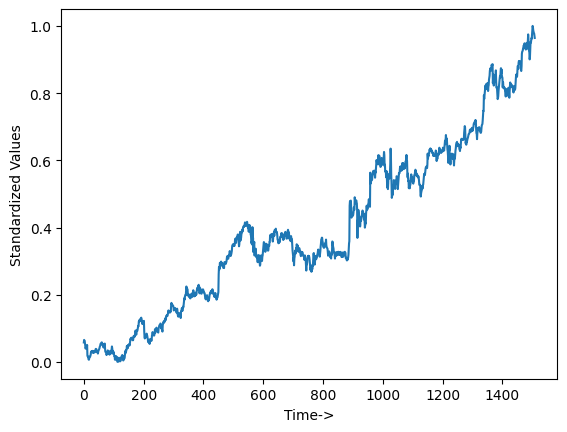

In [7]:
plt.plot(train_scaled)
plt.ylabel("Standardized Values")
plt.xlabel("Time->")
plt.show()

### Create data structure to train model  
Taking reference of past 60 days to predict future stock price  
x_train will have data of 60 days prior to current date and y_train will have price on current date

In [8]:
x_train = []
y_train = []
time = 60
for i in range(60,train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train.shape,y_train.shape

((1449, 60), (1449,))

In [10]:
x_train = np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1449, 60, 1)

### Build model

In [11]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,Dropout

2024-04-29 18:42:39.456955: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 18:42:40.372484: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
model = Sequential()

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse')
model.summary()

2024-04-29 18:42:41.034939: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-29 18:42:41.043498: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/sanket/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  sup

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 60, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 60, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,801 (69.54 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(x_train,y_train,epochs=10,batch_size=30,validation_split=0.05)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.5164 - val_loss: 0.2050
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2422 - val_loss: 0.0014
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.1651 - val_loss: 0.0045
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.1189 - val_loss: 0.0076
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0905 - val_loss: 0.0104
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0666 - val_loss: 0.0174
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0465 - val_loss: 0.0013
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0438 - val_loss: 0.0024
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0319 - val_loss: 0.0210
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0299 - val_loss: 0.0018


### Prepare test dataset

In [14]:
data = pd.concat((train_df['Open'],test_df['Open']),axis=0)

In [15]:
test_input = data.iloc[len(data) - len(test_df) - time : ].values
test_input.shape

(185,)

In [16]:
test_input = test_input.reshape(-1,1)
test_input.shape

(185, 1)

In [17]:
test_scaled = scaler.transform(test_input)

#### Create test data set

In [18]:
x_test = []
for i in range(time,test_scaled.shape[0]):
    x_test.append(test_scaled[i - time: i,0 ])
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [19]:
x_test = np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [20]:
y_test = test_df.loc[:,"Open"].values

### Model Prediction

In [21]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


In [22]:
y_pred = scaler.inverse_transform(y_pred)

In [23]:
output = model.evaluate(x=x_test,y=y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1199082.7500


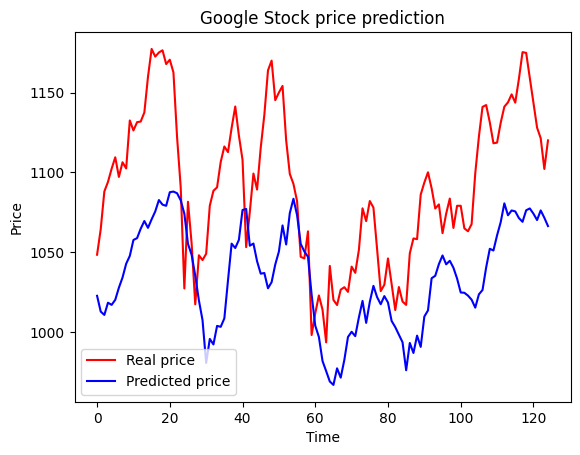

In [24]:
plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(y_pred, color = 'blue', label = 'Predicted price')

plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()